<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-6/bozzato_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Partial differential equation**
**Bozzato Federico**

# **Abstract**

In the previous lab, we have talked about the initial value problem for which we have provided approximation tools. In this lab, instead, we will analyze a different problem involving differential equations: the boundary value problem both in one and two dimensions.

#**About the code**

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time

import numpy as np
from numpy import linalg as la

from matplotlib import tri
from matplotlib import pyplot as plt

from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

The boundary value problem is an ordinary differential equation where boundary conditions are specified at the boundaries of the domain where the problem is given [1]. If the problem is posed in one dimension, the boundaries are the ends of an interval; while, instead, if the the problem is posed in two or more dimensions, the boundaries could be either a curve, or a superface or even a volume.

This report is divided into three parts:
1. Methods: in this section, each algorithm is presented and explained, giving also the mathematic definition of the operation the algorithm implements.

2. Results: in this section, the results of each algorithm are presented.

3. Discussion: in this last section, results are discussed.



#Methods

This section is divided into two subsection: the mandatory part and the extra assignment.

##Mandatory assignment

###1. FEM for 1D boundary value problem $-u''(x) = f(x)$ with $u(0)=u(1)=0$

####Definition
The boundary value problem (bvp for short) is defined as

>$
  \begin{cases}
    -u''(x)=f(x),    \quad  x\in(a,b) \\
    u(a)= \alpha \\
    u(b)=\beta
  \end{cases}
$

where $f(x)\in\mathcal{C}([a,b])$, and $u(a)=\alpha$ and $u(b)= \beta$ are the boundary conditions. Since the boundary conditions involve the function $u$ itself, they are named *Dirichlet boundary condition* [1].

####Solution
We are now interested in how to find an approximation to the bvp defined as above. One way is to define a mesh dividing the interval $I=[a,b]$ into $M$ nodes, that is

>$
a=x_0 < x_1 < \dots < x_{m+1}=b
$

Now, we know that the first and second order derivatives are defined as

>$
\begin{align}
  \dfrac{du(x)}{dx}&= \lim_{h\to0} \dfrac{u(x+h)-u(x-h)}{2h} \\
  \dfrac{d^2u(x)}{dx^2}&=\lim_{h\to0} \dfrac{u(x-h) -2u(x) + u(x+h)}{h^2}
\end{align}
$

Given $u_i$, which is the approximation of $u(x)$ at the point $x_i$ of the mesh, the second order derivative can be rewritten as the following [2]:

>$
  -u''(x_i)= \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_i^2}
$

where the distance between two consecutive mesh nodes is $h_i$. As we can notice, the approximated second order derivative is defined only for the internal nodes of the mesh, because if we take the intial point $x_0$, no $u_{-1}$ is defined.

Now, we are ready to rewrite the bvp as the following system:

>$
\begin{cases}
  \dfrac{u_{0} - 2u_1 + u_{2}}{h_1^2} = f(x_1) \\
  \qquad \quad \vdots \\
  \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_1^2} = f(x_i) \\
  \qquad \quad \vdots \\
  \dfrac{u_{m-1} - 2u_m + u_{m+1}}{h_1^2} = f(x_m) 
\end{cases}
$

where the $f(x_i)$ is the value of $f$ evaluated at the $i$-th node $x_i$ of the mesh.

As we can notice, the first members of the first and last equations in the above system are different from the others, because they contain the boundary values $u_0$ and $u_{m+1}$, which can be moved to the rightside of the equation. Thus, the final form of the above system will be

>$
\begin{cases}
  \dfrac{ - 2u_1 + u_{2}}{h_1^2} = f(x_1) - \dfrac{u_0}{h_1^2} = f(x_1) - \dfrac{\alpha}{h_1^2}\\
  \qquad \quad \vdots \\
  \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_i^2} = f(x_i) \\
  \qquad \quad \vdots \\
  \dfrac{u_{m-1} - 2u_m}{h_m^2} = f(x_m) - \dfrac{u_{m+1}}{h_m^2}=f(x_m) - \dfrac{\beta}{h_m^2}\\
\end{cases}
$

The system can be rewritten in the following way:

>$
Sx=b \quad \Longleftrightarrow \quad \begin{pmatrix}
  -\dfrac{2}{h_1^2} & \dfrac{1}{h_1^2} & 0  & 0& \dots & 0 \\
  \dfrac{1}{h_2^2} & \ddots & \ddots & 0  & \dots & 0 \\
  0 & \ddots & \ddots &\ddots & 0 & 0 \\
  \vdots   & 0 & \ddots & \ddots &\ddots & 0\\
  \vdots  &\vdots & 0 & \ddots & \ddots & \dfrac{1}{h_{m-1}^2}\\
  0 & 0 & 0 & 0 & \dfrac{1}{h_m^2} & -\dfrac{2}{h_m^2}
\end{pmatrix} \begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_{m}
\end{pmatrix} = \begin{pmatrix}
f(x_1) - \dfrac{\alpha}{h^2_1} \\
f(x_2) \\
f(x_3) \\
\vdots \\
f(x_m) - \dfrac{\beta}{h_m^2}
\end{pmatrix}
$

where $S\in\mathbb{R}^{m\times m}$ is the stiffness matrix, $b\in\mathbb{R}^m$ is the load vector and $x\in\mathbb{R}^m$ is the solution vector of $\{u(x_i)\}_{i=1}^M$.

####Implementation
The implementation follows step by step what has been explained in the previous paragraph and it can be summarized in the following steps:

1. calculate the length $h_i$ of each subinterval in the mesh;
2. calculate the stiffness matrix $S$;
3. calculate the load vector $b$;
4. add the boundary conditions to the load vector;
5. calculate the solution vector $x$ of the system $Sx=b$ with least squares;
6. add the values at the ends for the complete solution.

In [0]:
def bvp1d(fun, mesh, ua, ub):
  '''
  Solves the one dimensional boundary value problem -u''(x)= fun, with u(a)= ua
  and u(b)= ub over the mesh which discretizes the interval [a,b].
  Parameters:
  - fun: one variable function
  - mesh: mesh discritizing the interval [a,b]
  - ua: boundary condition at the point a
  - ub: boundary condition at the point b
  Output:
  - S: stiffness matrix
  - b: load vector
  - x: approximate solution of the bvp -u''(x)= fun
  '''
  if not isinstance(mesh, np.ndarray):
    mesh= np.array(mesh)
    
  n= mesh.shape[0]
  h= mesh[1:] - mesh[:-1]                     # vector of all the lengths
  inNodes= n-2                                # inNodes= number of inner nodes
  
    
  ############################
  ###   STIFFNESS MATRIX   ###
  ############################
  S= np.zeros((inNodes,inNodes))              # S is defined only for the internal
                                              # nodes
  S[0,0]= 1/h[0]**2
  S[-1,-1]= 1/h[-1]**2
  
  for i in range(0,inNodes-1):
    S[i,i]+= 1/h[i]**2
    S[i+1,i]= -1/h[i]**2
    S[i,i+1]= -1/h[i]**2
    S[i+1,i+1]+= 1/h[i]**2
    
  ############################
  #####   LOAD  FACTOR   #####     
  ############################
  b= np.zeros((inNodes,1))
  b[0]= ua/(h[0]**2)
  b[-1]= ub/(h[-1]**2)
  
  for k in range(1,n-1):
    b[k-1]+= - fun(mesh[k])                   # here the bvp is u''(x) = - fun
     
  ############################
  ###       SOLUTION       ###        
  ############################
  _x= la.lstsq(S,b,rcond=None)[0]
  
  x= np.zeros((n,1))                          # update the solution with the contraints
  x[0]= ua
  x[1:n-1]= _x
  x[-1]= ub
    
  return S, b, x

##Extra assignment

###2. Function: FEM for 2D Poisson equation -Delta u(x) = f(x), with triangular mesh

In [0]:
def trial(fun, mesh, meshSize, u0= None):
  if not isinstance(u0,np.ndarray):
    u0= np.array(u0)
    
  x= mesh.x
  y= mesh.y

  h_x= max(x[1:] - x[:-1])
  h_y= max(y[1:] - y[:-1])

  s00= 1/h_x**2 + 1/h_y**2
  s01= -1/h_x**2
  s02= -1/h_y**2
  s11= 1/h_x**2
  s12= 0
  s22= 1/h_y**2

  mini_stiffness= np.array( [[s00, s01, s02],
                             [s01, s11, s12],
                             [s02, s12, s22]] )
    
  Nx= meshSize[0]
  Ny= meshSize[1]
    
  nInnerNodes= (Nx-2)*(Ny-2)
  S= np.zeros((nInnerNodes,nInnerNodes))
    
  return mini_stiffness, S

In [22]:
def createMesh(Nx,Ny):
  hx= 1 / (Nx-1)
  hy= 1 / (Ny-1)
  
  x = np.zeros((Nx*Ny))
  y = np.zeros((Nx*Ny))
  for i in range(Nx):
    for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

  mesh = tri.Triangulation(x,y)
  
  return mesh

meshSize= [4,4]
mesh= createMesh(meshSize[0],meshSize[1])
s, S= trial(None,mesh,meshSize)

print(s)
print(S)
print(mesh.edges)

[[18. -9. -9.]
 [-9.  9.  0.]
 [-9.  0.  9.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 1  0]
 [ 2  1]
 [ 3  2]
 [ 4  0]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  4]
 [ 6  2]
 [ 6  5]
 [ 7  2]
 [ 7  3]
 [ 7  6]
 [ 8  4]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9  8]
 [10  6]
 [10  9]
 [11  6]
 [11  7]
 [11 10]
 [12  8]
 [12  9]
 [13  9]
 [13 12]
 [14  9]
 [14 10]
 [14 11]
 [14 13]
 [15 11]
 [15 14]]


-----------------------------------------------------------------------------------------------

In [4]:
for i in [6,7,8,11,12,13,16,17,18]:
  print('u({}) + u({}) - 4u({}) + u({}) + u({}) = -f(x({}))'.format(i-5, i-1, i, i+1, i+5,i))

u(1) + u(5) - 4u(6) + u(7) + u(11) = -f(x(6))
u(2) + u(6) - 4u(7) + u(8) + u(12) = -f(x(7))
u(3) + u(7) - 4u(8) + u(9) + u(13) = -f(x(8))
u(6) + u(10) - 4u(11) + u(12) + u(16) = -f(x(11))
u(7) + u(11) - 4u(12) + u(13) + u(17) = -f(x(12))
u(8) + u(12) - 4u(13) + u(14) + u(18) = -f(x(13))
u(11) + u(15) - 4u(16) + u(17) + u(21) = -f(x(16))
u(12) + u(16) - 4u(17) + u(18) + u(22) = -f(x(17))
u(13) + u(17) - 4u(18) + u(19) + u(23) = -f(x(18))


In [0]:
def bvp2d(fun, mesh, meshSize, u0):
  # u0 must have 1 column with nuumner boundary vertix e 2 column the values
  
  if not isinstance(u0,np.ndarray):
    u0= np.array(u0)
  
  x= mesh.x
  y= mesh.y
 
  delta_x= max(x[1:] - x[:-1])
  delta_y= max(y[1:] - y[:-1])
  
  #print(delta_x)
  #print(delta_y)
  
  Nx= meshSize[0]
  Ny= meshSize[1]
    
  nInnerNodes= (Nx-2)*(Ny-2)
  S= np.zeros((nInnerNodes,nInnerNodes))
  
  
  # stiffness matrix assemboer
  for k in range(0, nInnerNodes-3):
    S[k,k]= -2*(1/delta_x**2 + 1/delta_y**2)
    S[k+1,k]= 1/delta_x**2
    S[k,k+1]= 1/delta_x**2
    
    S[k+3,k]= 1/delta_y**2
    S[k,k+3]= 1/delta_y**2
    
  for k in range(nInnerNodes-3, nInnerNodes):
    if k < nInnerNodes-1:
      S[k,k]= -2*(1/delta_x**2 + 1/delta_y**2)
      S[k+1,k]= 1/delta_x**2
      S[k,k+1]= 1/delta_x**2
    else:
      S[k,k]= -2*(1/delta_x**2 + 1/delta_y**2)
      
  # inner nodes
  allNodes= range(0,Nx*Ny)
  innerNodes= []
  for v in allNodes:
    if v not in u0[:,0]:
      innerNodes.append(v)
  
  innerNodes= np.array(innerNodes)
  b= np.array( [fun([mesh.x[i],mesh.y[i]]) for i in innerNodes] )
  
  
  # add initial condition (boundaries)
  counter = 0
  for v in innerNodes:
    boundaries= 0
    
    if v-Nx in u0[:,0]:
      ind= np.where(u0[:,0]== v-Nx)[0][0]
      boundaries-= u0[ind,1]/(delta_y**2)
    
    if v-1 in u0[:,0]:
      ind= np.where(u0[:,0]== v-1)[0][0]
      boundaries-= u0[ind,1]/(delta_x**2)
      
    if v+1 in u0[:,0]:
      ind= np.where(u0[:,0]== v+1)[0][0]
      boundaries-= u0[ind,1]/(delta_x**2)
      
    if v+Nx in u0[:,0]:
      ind= np.where(u0[:,0]== v+Nx)[0][0]
      boundaries-= u0[ind,1]/(delta_y**2)
      
    b[counter]+= boundaries
    counter+= 1
  
  print(S.shape)
  print(b.shape)
  _x= la.lstsq(S,b,rcond=None)[0]
  
  x= np.zeros((Nx*Ny,1))

  for i in range(Nx*Ny):
    if i in u0[:,0]:
      ind= np.where(u0[:,0] == i)[0][0]
      x[i]= u0[ind,1]
    else:
      ind= np.where(innerNodes == i)[0][0]
      x[i]= _x[ind]
  
  return S, b, x.flatten()
  

<Figure size 576x396 with 0 Axes>

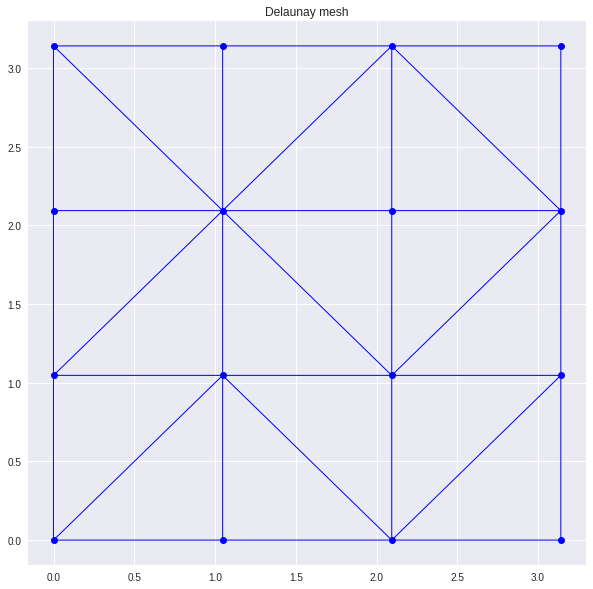

row =  1
4
8
row =  2
8
12
[0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15]
(16,)
(4, 4)
(4,)


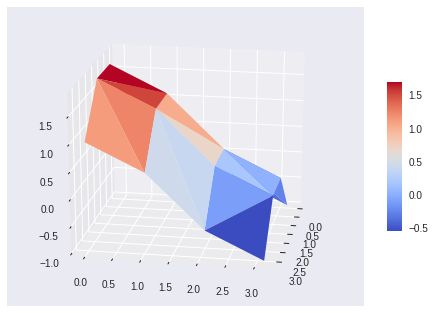

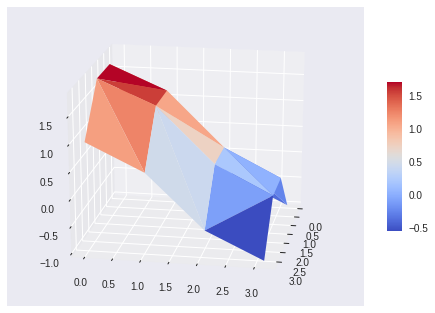

1.00    1.00
1.87    1.87
1.87    1.87
1.00    1.00
0.50    0.50
1.37    1.42
1.37    1.42
0.50    0.50
-0.50    -0.50
0.37    0.40
0.37    0.40
-0.50    -0.50
-1.00    -1.00
-0.13    -0.13
-0.13    -0.13
-1.00    -1.00


In [8]:
def createMesh(Nx,Ny):
  hx= np.pi / (Nx-1)
  hy= np.pi / (Ny-1)
  
  x = np.zeros((Nx*Ny))
  y = np.zeros((Nx*Ny))
  for i in range(Nx):
    for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

  mesh = tri.Triangulation(x,y)
  
  return mesh


def fun(x,y):
  return np.sin(x) + np.cos(y)

fsec= lambda u: -np.sin(u[0]) - np.cos(u[1])

################################################################################
meshSize= [4,4]
mesh= createMesh(meshSize[0], meshSize[1])

plt.figure()
plt.figure(figsize=(10,10))
plt.triplot(mesh, 'bo-', lw=1)
plt.title('Delaunay mesh')
plt.show()

nodes= []
for row in range(0,meshSize[1]):
  if row == 0 or row == meshSize[1]-1:
    for col in range(0,meshSize[0]):
      nodes.append(col+ row*(meshSize[0]))
  else:
    print('row = ', row)
    print(row*meshSize[0])
    print(meshSize[0] + row*meshSize[0])
    nodes.append(row*(meshSize[0]))
    nodes.append(row*(meshSize[0]) + meshSize[0]-1)
  
  
print(nodes)
print(mesh.x.shape)
u0= np.zeros((len(nodes),2))
u0[:,0]= nodes

index= 0
for n in nodes:
  u0[index,1]= fun(mesh.x[n],mesh.y[n])
  index+= 1



S, b, x= bvp2d(fsec, mesh, meshSize, u0)


#print(mesh.x)
#print(mesh.y)
#print(u0)



fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_trisurf(mesh, fun(mesh.x,mesh.y), cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_trisurf(mesh, x, cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

for k in range(0,meshSize[0]*meshSize[1]):
  print('{:.2f}    {:.2f}'.format(fun(mesh.x[k],mesh.y[k]),x[k]))

# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

[0.   0.25 0.5  0.75 1.  ]
S=
 [[ 32. -16.   0.]
 [-16.  32. -16.]
 [  0. -16.  32.]]
b=
 [[-0.25 -0.5  15.25]]
x=
 [[0.       ]
 [0.2109375]
 [0.4375   ]
 [0.6953125]
 [1.       ]]


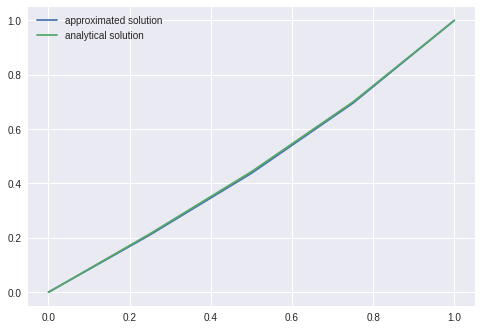

In [7]:
def fun(x):
	e= np.e
	C1= -e/(e**2-1)
	C2= -C1
	return C1*np.e**(-x)+C2*np.e**x

mesh= np.array([0, 0.25, 0.5, 0.75, 1])         # mesh= [ 0, pi/4, pi/2, 3*pi/4, pi ]
print(mesh)

fsec= lambda x : x                                 # bvp: u''= -x with u(0)=u(pi)=0


S, b, x= bvp1d(fsec, mesh, fun(0), fun(1))
print('S=\n',S)
print('b=\n',b.T)
print('x=\n',x)

plt.figure()
plt.plot(mesh,x)
plt.plot(mesh,fun(mesh))
plt.legend(['approximated solution', 'analytical solution'])
plt.show()

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

# **APPENDIX**

[1] from Lecture Notes, *Boundary values problems, chapter 16*, pg. 215

[2] from Youtube, [ch10 5. Finite Difference method for two-point boundary value problem. Wen Shen](https://www.youtube.com/watch?v=hCjPyeA4A9Q)


[fast stiffness](https://www.hindawi.com/journals/jam/2014/932314/)

[MIT Numerical Methods for PDE Lecture 3: Finite Difference for 2D Poisson's equation](https://www.youtube.com/watch?v=bLiaz-IHX_Y)

